In [1]:
from finlab.data import Data
from finlab import ml

import talib
import matplotlib.pyplot as plt
import talib.abstract as abstract
import pandas as pd

%matplotlib inline

stock_id = '0050'

In [2]:
data = Data()

close_price = data.get("收盤價")
open_price = data.get("開盤價")
high_price = data.get("最高價")
low_price = data.get("最低價")
vol_price = data.get("成交股數")

In [3]:
df = pd.DataFrame({
    'open_price': open_price[stock_id],
    'close_price': close_price[stock_id],
    'high_price': high_price[stock_id],
    'low_price': low_price[stock_id],
    'volume_price': vol_price[stock_id]
}).astype(float)

In [4]:
# 計算每日 TR
df['H-L'] = df['high_price'] - df['low_price']
df['H-C'] = abs(df['high_price'] - df['low_price'].shift(1))
df['L-C'] = abs(df['low_price'] - df['low_price'].shift(1))
df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis = 1, skipna = True)
df

,open_price,close_price,high_price,low_price,volume_price,H-L,H-C,L-C,TR
date,,,,,,,,,
2007-04-23,57.55,57.85,58.10,57.50,8571000.0,0.60,NaN,NaN,0.60
2007-04-24,57.90,58.10,58.10,57.60,2483010.0,0.50,0.60,0.10,0.60
2007-04-25,57.80,57.60,57.85,57.45,1232000.0,0.40,0.25,0.15,0.40
2007-04-26,57.95,57.70,58.00,57.55,6357000.0,0.45,0.55,0.10,0.55
2007-04-27,57.70,57.50,57.80,57.20,1070000.0,0.60,0.25,0.35,0.60
2007-04-30,57.55,56.90,57.55,56.75,2287340.0,0.80,0.35,0.45,0.80
2007-05-02,56.90,57.55,57.70,56.90,1825500.0,0.80,0.95,0.15,0.95
2007-05-03,57.80,58.20,58.30,57.80,5413160.0,0.50,1.40,0.90,1.40
2007-05-04,58.75,59.20,59.20,58.70,7333000.0,0.50,1.40,0.90,1.40


In [5]:
# 利用talib來計算ATR
df['ATR_talib'] = talib.ATR(df['high_price'], df['low_price'], df['close_price'])

In [6]:
# 計算ATR
period = 15
df['ATR'] = df['TR'].rolling(period).mean()
df

,open_price,close_price,high_price,low_price,volume_price,H-L,H-C,L-C,TR,ATR_talib,ATR
date,,,,,,,,,,,
2007-04-23,57.55,57.85,58.10,57.50,8571000.0,0.60,NaN,NaN,0.60,NaN,NaN
2007-04-24,57.90,58.10,58.10,57.60,2483010.0,0.50,0.60,0.10,0.60,NaN,NaN
2007-04-25,57.80,57.60,57.85,57.45,1232000.0,0.40,0.25,0.15,0.40,NaN,NaN
2007-04-26,57.95,57.70,58.00,57.55,6357000.0,0.45,0.55,0.10,0.55,NaN,NaN
2007-04-27,57.70,57.50,57.80,57.20,1070000.0,0.60,0.25,0.35,0.60,NaN,NaN
2007-04-30,57.55,56.90,57.55,56.75,2287340.0,0.80,0.35,0.45,0.80,NaN,NaN
2007-05-02,56.90,57.55,57.70,56.90,1825500.0,0.80,0.95,0.15,0.95,NaN,NaN
2007-05-03,57.80,58.20,58.30,57.80,5413160.0,0.50,1.40,0.90,1.40,NaN,NaN
2007-05-04,58.75,59.20,59.20,58.70,7333000.0,0.50,1.40,0.90,1.40,NaN,NaN


ATR_Talib


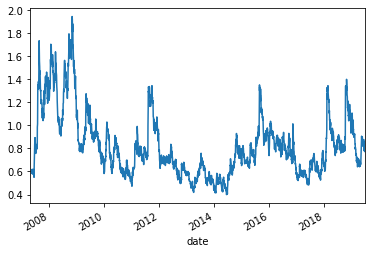

ATR


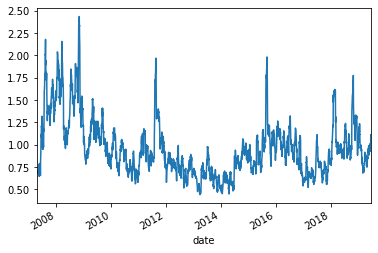

In [7]:
print('ATR_Talib')
df['ATR_talib'].plot()
plt.show()
print('ATR')
df['ATR'].plot()
plt.show()